In [1]:
import pandas as pd
import  numpy as  np
import matplotlib.pyplot  as  plt
import seaborn  as  sns
from sklearn.cluster  import KMeans

In [2]:

df= pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

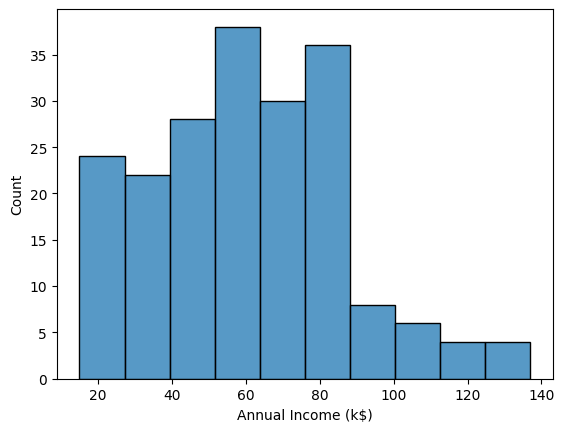

In [4]:
sns.histplot(df['Annual Income (k$)'])

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

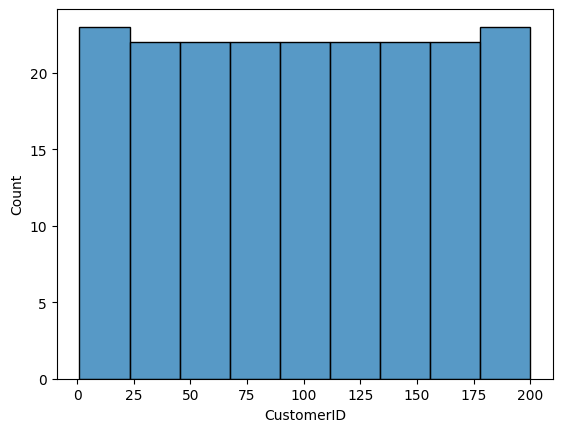

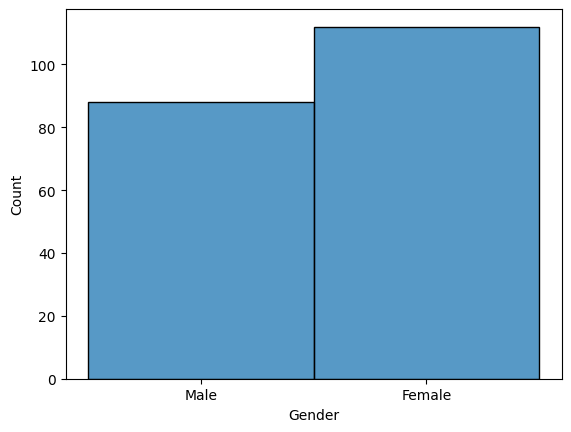

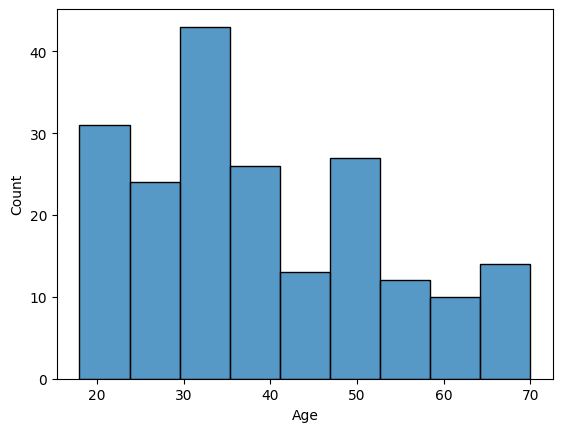

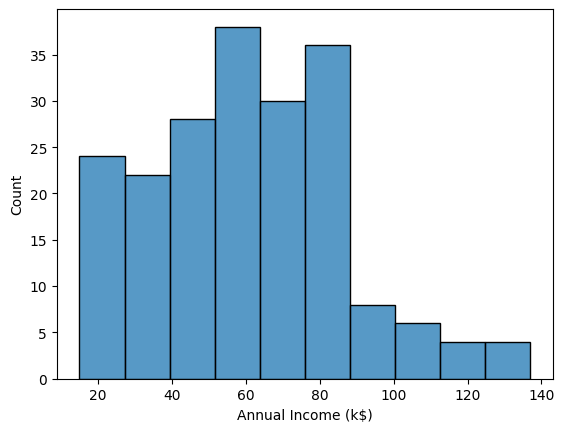

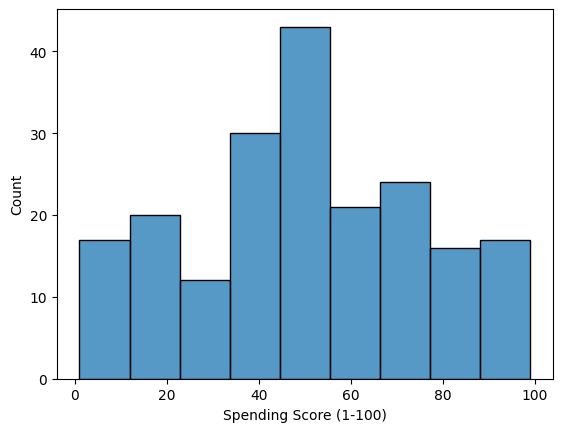

In [6]:
cols=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.histplot(df[i])

/tmp/ipykernel_20/2990425741.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Annual Income (k$)'], shade= True)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

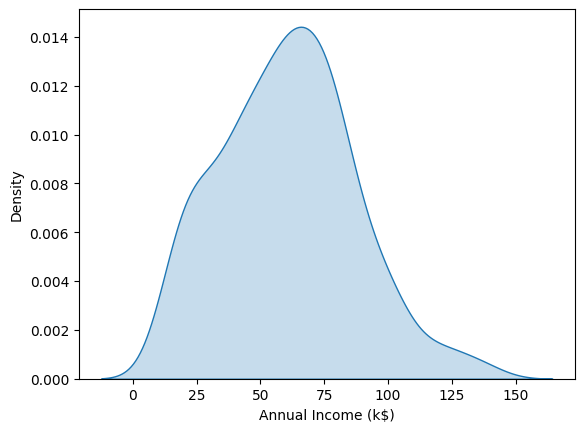

In [7]:
sns.kdeplot(df['Annual Income (k$)'], shade= True)

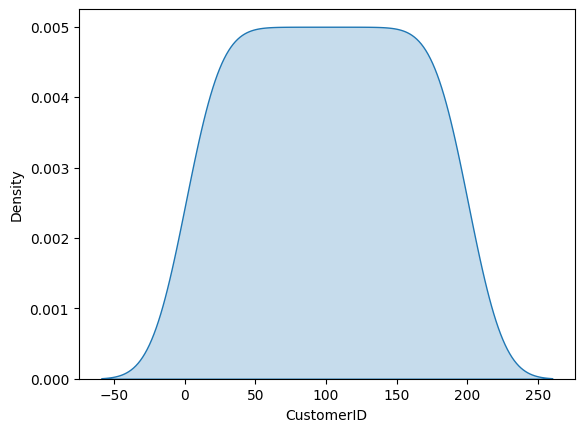

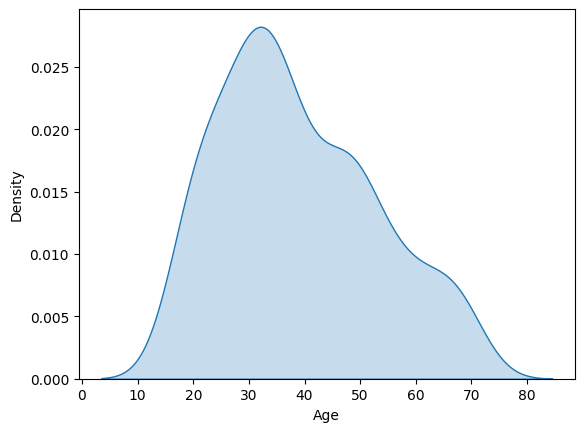

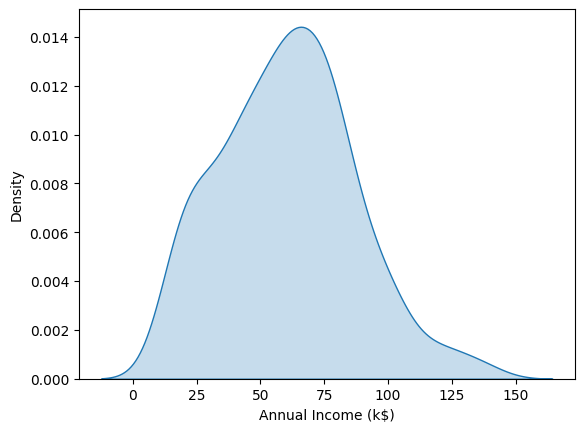

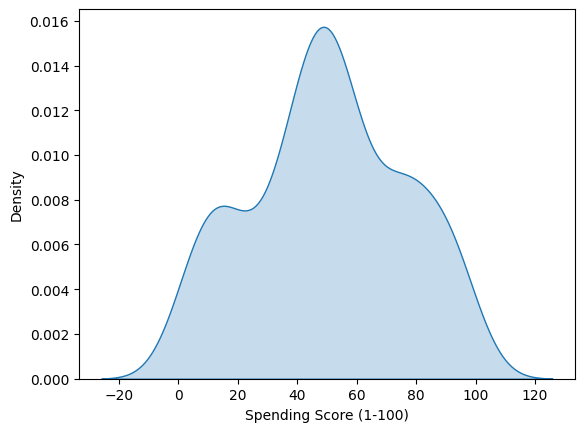

In [8]:
import warnings
warnings.filterwarnings("ignore")
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for x in cols:
    plt.figure()
    sns.kdeplot(df[x],shade=True)

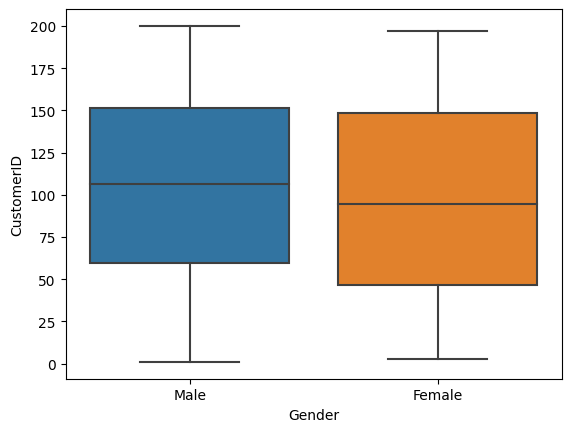

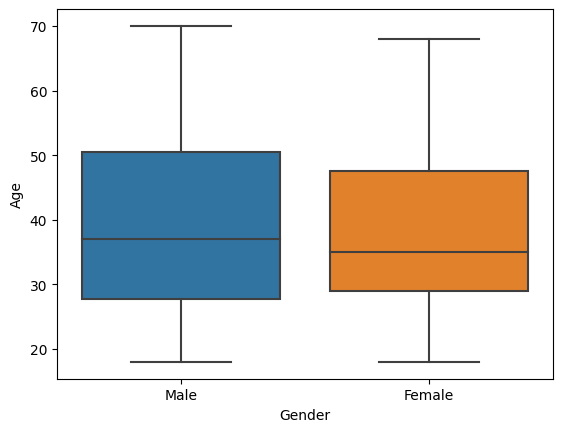

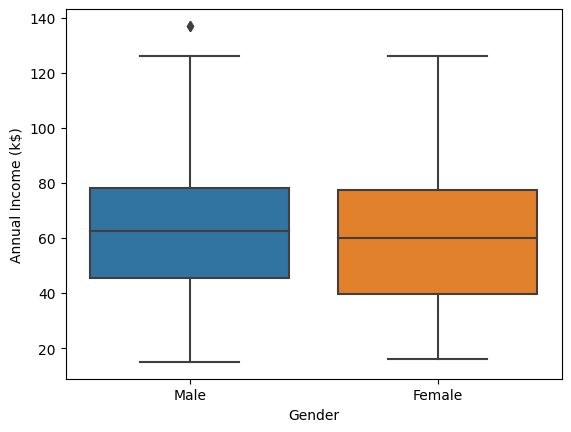

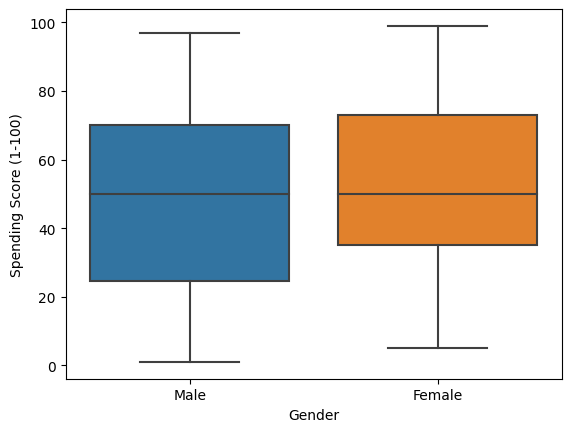

In [9]:
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.boxplot(data =df, x='Gender',y=df[i])

In [10]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

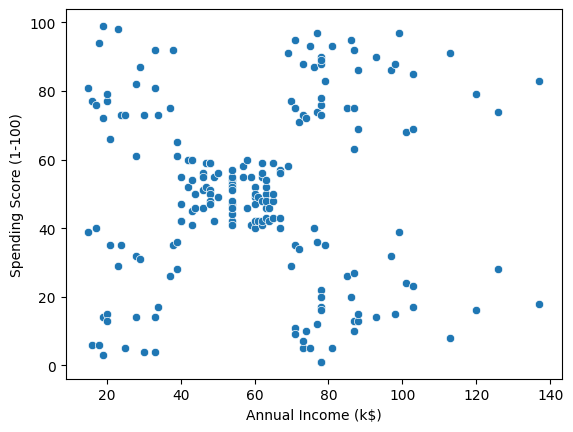

In [11]:
# starting with making the  scatter plot for our parameters
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

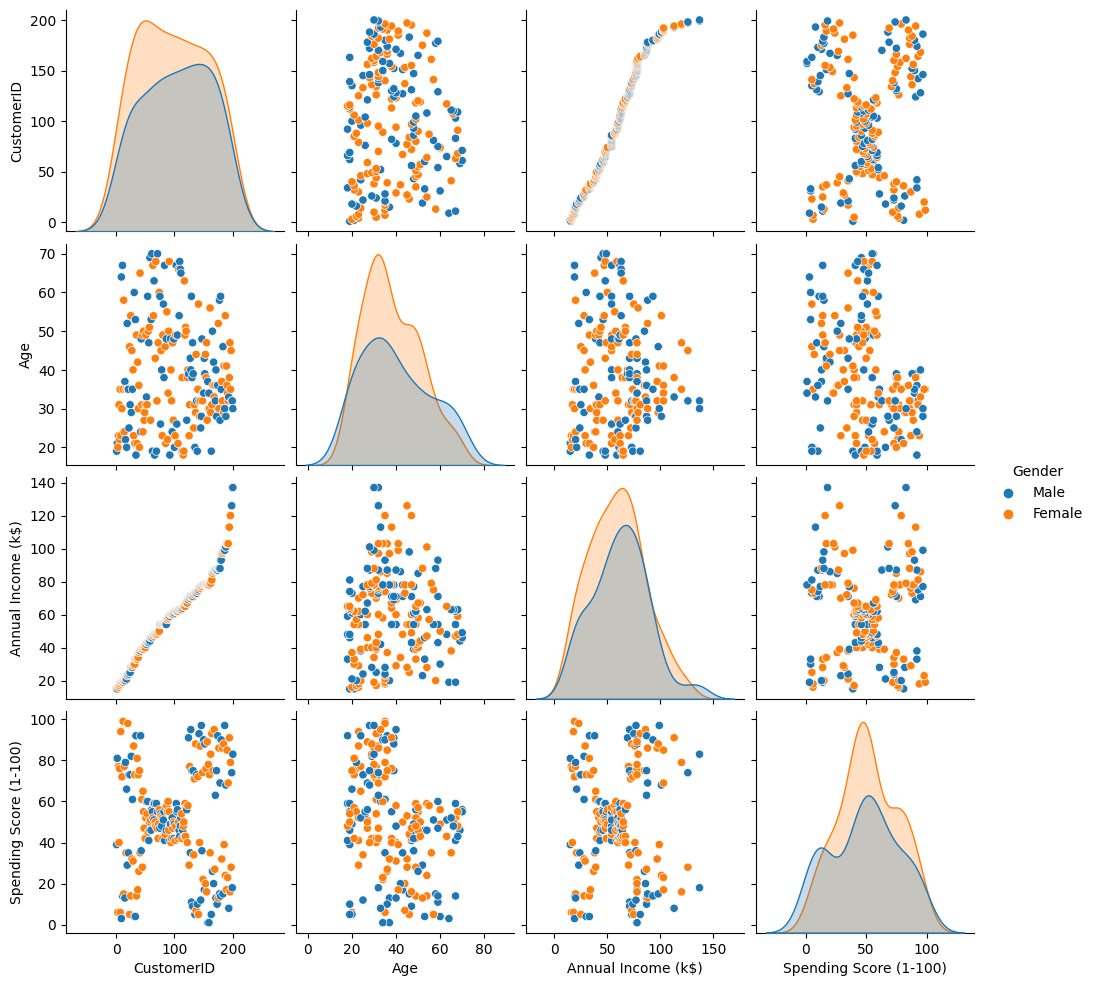

In [12]:
sns.pairplot(df,hue='Gender')

In [13]:
def g(df):
    df2 = df.groupby(['Gender'])[['Annual Income (k$)','Age','Spending Score (1-100)']].mean()
    return df2


df2 = g(df.copy())
print(df2)

        Annual Income (k$)        Age  Spending Score (1-100)
Gender                                                       
Female           59.250000  38.098214               51.526786
Male             62.227273  39.806818               48.511364


<Axes: >

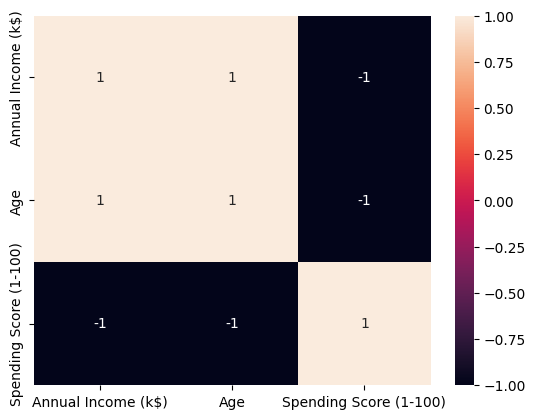

In [14]:
sns.heatmap(df2.corr(),annot=True)

##### Till now ,  I know the how the parameters of data is  assiocated with each  others

### Clustering - Univariate , Bivariate , Multivariate

In [15]:
clustering1= KMeans(n_clusters=4)

In [16]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=4)

In [17]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [18]:
df['income cluster']=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [19]:
df['income cluster'].value_counts()

income cluster
0    68
3    62
2    50
1    20
Name: count, dtype: int64

In [20]:
clustering1.inertia_

13278.112713472487

In [21]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13575.758441558448,
 8667.679614837509,
 5050.904761904763,
 3931.988095238096,
 2880.4579365079376,
 2274.165567765568,
 1745.8751748251748]

<function matplotlib.pyplot.show(close=None, block=None)>

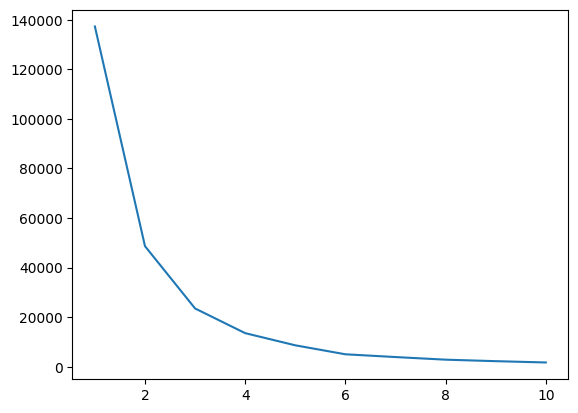

In [23]:
plt.plot(range(1,11),inertia_scores)
plt.show

It seems that the Elbow graph is starting to change after the record 5

In [24]:
df.groupby('income cluster')[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].mean()


,Age,Spending Score (1-100),Annual Income (k$)
income cluster,,,
0,43.970588,50.014706,54.764706
1,36.600000,52.000000,109.700000
2,35.280000,49.480000,27.400000
3,36.838710,50.403226,77.806452


In [25]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])


KMeans(n_clusters=5)

In [26]:
clustering2.labels_
df['spending score & annual income']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,0


In [27]:
clustering2.inertia_

44448.45544793371

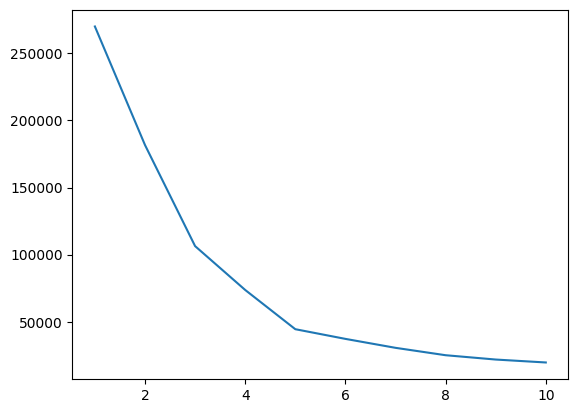

In [28]:
inertia_scores2=[]
for  i in  range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [29]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,88.200000,17.114286


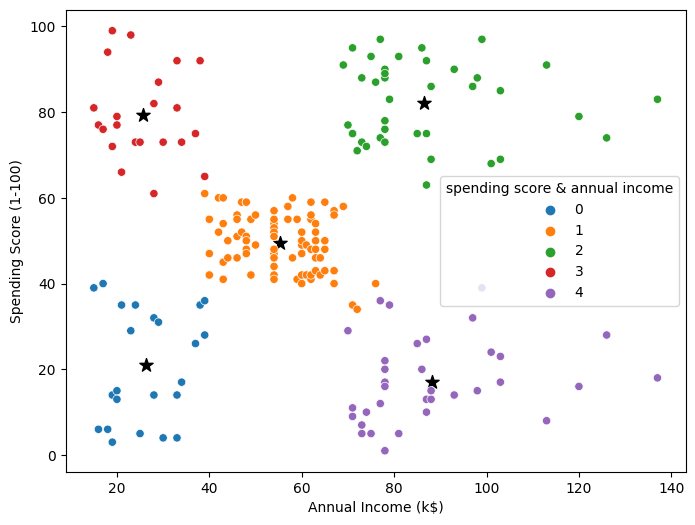

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data = df,x='Annual Income (k$)',y= 'Spending Score (1-100)',hue='spending score & annual income',palette='tab10')
plt.savefig('Clustering Bivariate.png')

In [31]:
df.groupby('spending score & annual income')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending score & annual income,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scale = StandardScaler()

In [34]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,4
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,4


In [35]:
dff=pd.get_dummies(df,drop_first=True)
dff

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income,Gender_Male
0,1,19,15,39,2,0,True
1,2,21,15,81,2,3,True
2,3,20,16,6,2,0,False
3,4,23,16,77,2,3,False
4,5,31,17,40,2,0,False
...,...,...,...,...,...,...,...
195,196,35,120,79,1,2,False
196,197,45,126,28,1,4,False
197,198,32,126,74,1,2,True
198,199,32,137,18,1,4,True


In [36]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'spending score & annual income', 'Gender_Male'],
      dtype='object')

In [37]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head(9)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
5,22,17,76,False
6,35,18,6,False
7,23,18,94,False
8,64,19,3,True


In [38]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


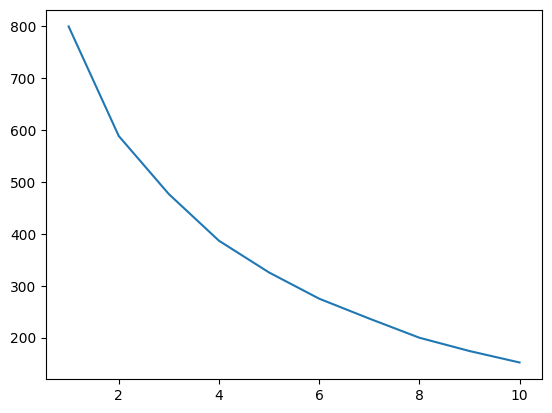

In [39]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [40]:
df.to_csv('Clustering.csv')